## Setup

In [32]:
import warnings
warnings.filterwarnings('ignore')

import os
import paths

import importlib
import numpy as np
import xarray as xr
import scripts.archive.basin_masks
import matplotlib.pyplot as plt

import ecco_v4_py as ecco

from scripts.archive import streamfunction_LLC0090_utils as llc_streamfunction

In [33]:
# A helper function to format the input files based on a given latitude
def format_lat_lon(value):
    """Format latitude or longitude with N/S or E/W suffix."""
    if value < 0:
        return f"{abs(value)}S"
    else:
        return f"{value}N"

## Loading Relevant Data

In [36]:
# Load the data and the native geometry grid 
ecco_grid = xr.open_dataset(paths.geom_fp)

#nc_files = (os.path.join(paths.VELOCITY_NATIVE_GRID, '*.nc'))
nc_files = (os.path.join(paths.BOLUS_NATIVE_GRID, '*.nc'))
nc_ds = xr.open_mfdataset(nc_files, data_vars='minimal',coords='minimal',compat='override')

ds = xr.merge((nc_ds, ecco_grid))
ds

<xarray.Dataset>
Dimensions:    (tile: 13, j_g: 90, i_g: 90, k_p1: 51, k_l: 50, j: 90, i: 90,
                time: 312, k: 50, nb: 4, k_u: 50, nv: 2)
Coordinates: (12/24)
    XG         (tile, j_g, i_g) float32 -115.0 -115.0 -115.0 ... -102.9 -109.0
    Zp1        (k_p1) float32 0.0 -10.0 -20.0 ... -5.678e+03 -6.134e+03
    Zl         (k_l) float32 0.0 -10.0 -20.0 ... -5.244e+03 -5.678e+03
    YC         (tile, j, i) float32 -88.24 -88.38 -88.52 ... -88.03 -88.08 -88.1
    XC         (tile, j, i) float32 -111.6 -111.3 -110.9 ... -105.6 -111.9
    YG         (tile, j_g, i_g) float32 -88.18 -88.32 -88.46 ... -87.99 -88.02
    ...         ...
  * k_p1       (k_p1) int32 0 1 2 3 4 5 6 7 8 9 ... 42 43 44 45 46 47 48 49 50
  * k_u        (k_u) int32 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * nb         (nb) float32 0.0 1.0 2.0 3.0
  * nv         (nv) float32 0.0 1.0
  * tile       (tile) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time       (time) datetime64[ns] 1992-01-16T18:00:00 ... 2017-12-16T06:00:00
Data variables: (12/24)
    VVELSTAR   (time, k, tile, j_g, i) float32 dask.array<chunksize=(1, 1, 13, 90, 90), meta=np.ndarray>
    WVELSTAR   (time, k_l, tile, j, i) float32 dask.array<chunksize=(1, 1, 13, 90, 90), meta=np.ndarray>
    UVELSTAR   (time, k, tile, j, i_g) float32 dask.array<chunksize=(1, 1, 13, 90, 90), meta=np.ndarray>
    CS         (tile, j, i) float32 ...
    SN         (tile, j, i) float32 ...
    rA         (tile, j, i) float32 ...
    ...         ...
    hFacC      (k, tile, j, i) float32 ...
    hFacW      (k, tile, j, i_g) float32 ...
    hFacS      (k, tile, j_g, i) float32 ...
    maskC      (k, tile, j, i) bool ...
    maskW      (k, tile, j, i_g) bool ...
    maskS      (k, tile, j_g, i) bool ...
Attributes: (12/63)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    time_coverage_end:               1992-02-01T00:00:00
    time_coverage_resolution:        P1M
    time_coverage_start:             1992-01-01T12:00:00
    title:                           ECCO Gent-McWilliams Ocean Bolus Velocit...
    uuid:                            4084c7b8-4182-11eb-897d-0cc47a3f43ff
    history_json:                    [{"$schema":"https:\/\/harmony.earthdata...

In [38]:
# Use latitudinal streamfunction in ecco package, customised to combine several basin masks together
latitude=-30
PSI = llc_streamfunction.calc_meridional_stf(ds, [latitude], doFlip = True, velocity_field='bolus', basin_name = ['atlExt'])

extra = 'atlantic_bolus'

output_file = os.path.join(paths.STREAMFUNCTIONS_ECCO_OUTPUT, 
                           f"{format_lat_lon(latitude)}", 
                           f"PSI_{extra}{format_lat_lon(latitude)}.nc")
PSI.to_netcdf(output_file)

[['atlExt']]
get_basin_name:  ['atl', 'mexico', 'hudson', 'med', 'north', 'baffin', 'gin'] C:\Users\aline\mambaforge\envs\gtc\Lib\site-packages\binary_data
load_binary_array: loading file C:\Users\aline\mambaforge\envs\gtc\Lib\site-packages\binary_data\basins.data
load_binary_array: data array shape  (1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4
shape after reading 
(13, 90, 90)
get_basin_name:  ['atl', 'mexico', 'hudson', 'med', 'north', 'baffin', 'gin'] C:\Users\aline\mambaforge\envs\gtc\Lib\site-packages\binary_data
load_binary_array: loading file C:\Users\aline\mambaforge\envs\gtc\Lib\site-packages\binary_data\basins.data
load_binary_array: data array shape  (1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact 

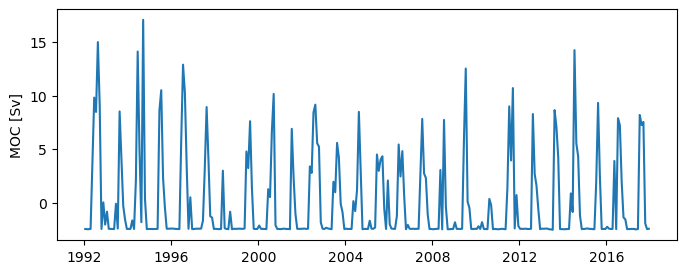

In [32]:
# Plot overturning streamfunction over time
plt.figure(figsize = (8, 3))
plt.plot(PSI.time, PSI.moc - PSI.moc.mean(dim = 'time'))

plt.ylabel('MOC [Sv]');

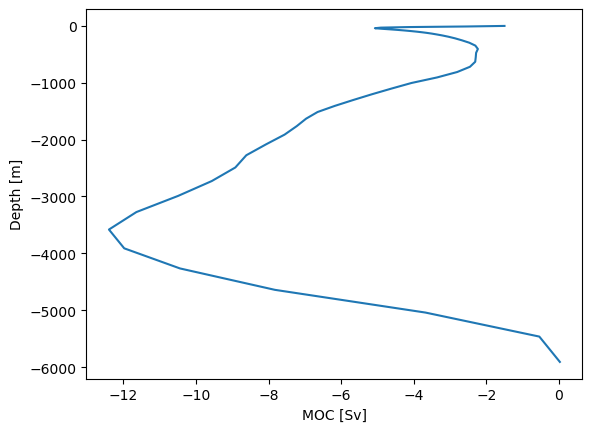

In [33]:
# Plot average streamfunction over depth space
plt.plot(PSI.psi_moc.mean(dim = 'time'), PSI.Z)

plt.xlabel('MOC [Sv]')
plt.ylabel('Depth [m]');

In [66]:
importlib.reload(strf_custom_utils)

<module 'streamfunction_ecco.streamfunction_custom_utils' from 'C:\\Users\\aline\\OTP\\streamfunction_ecco\\streamfunction_custom_utils.py'>

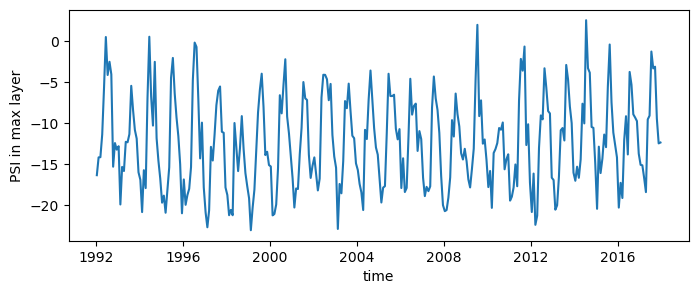

In [68]:
PSI_MAX_DENS = strf_custom_utils.get_PSI_at_max_density_level(PSI, max=True)

plt.figure(figsize = (8, 3))
plt.plot(PSI_MAX_DENS["time"], PSI_MAX_DENS["psi_moc"])

plt.xlabel('time')
plt.ylabel('PSI in max layer');

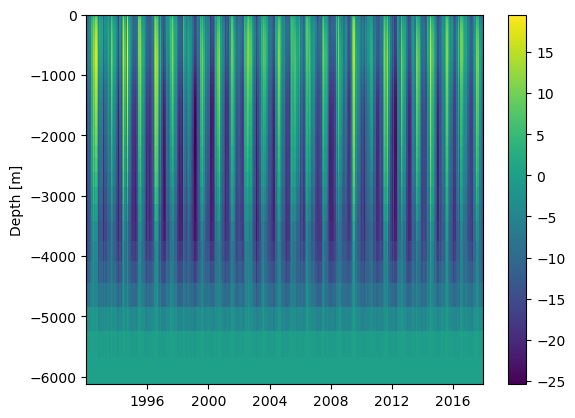

In [69]:
# Streamfunction over depth and time
plt.pcolormesh(PSI.time, PSI.Z, PSI.psi_moc.squeeze().T)
plt.colorbar()

plt.ylabel('Depth [m]');

## Open the output files so far to plot the streamfunctions

In [9]:
OUTPUT_DIR = paths.STREAMFUNCTIONS_ECCO_OUTPUT

PSI_26 = xr.open_dataset(os.path.join(OUTPUT_DIR, "26.5N", "PSI_residual26.5N.nc"))
PSI_30 = xr.open_dataset(os.path.join(OUTPUT_DIR, "30S", "PSI_residual30S.nc"))
PSI_pac30 = xr.open_dataset(os.path.join(OUTPUT_DIR, "30S", "PSI_pacific_residual30S.nc"))
PSI_ind30 = xr.open_dataset(os.path.join(OUTPUT_DIR, "30S", "PSI_indian_residual30S.nc"))
PSI_60 = xr.open_dataset(os.path.join(OUTPUT_DIR, "60S", "PSI_residual60S.nc"))
PSI_55 = xr.open_dataset(os.path.join(OUTPUT_DIR, "55S", "PSI_residual55S.nc"))

PSI_bol_26 = xr.open_dataset(os.path.join(OUTPUT_DIR, "26.5N", "PSI_bolus26.5N.nc"))
PSI_bol_30 = xr.open_dataset(os.path.join(OUTPUT_DIR, "30S", "PSI_bolus30S.nc"))
PSI_bol_55 = xr.open_dataset(os.path.join(OUTPUT_DIR, "55S", "PSI_bolus55S.nc"))
PSI_bol_60 = xr.open_dataset(os.path.join(OUTPUT_DIR, "60S", "PSI_bolus60S.nc"))

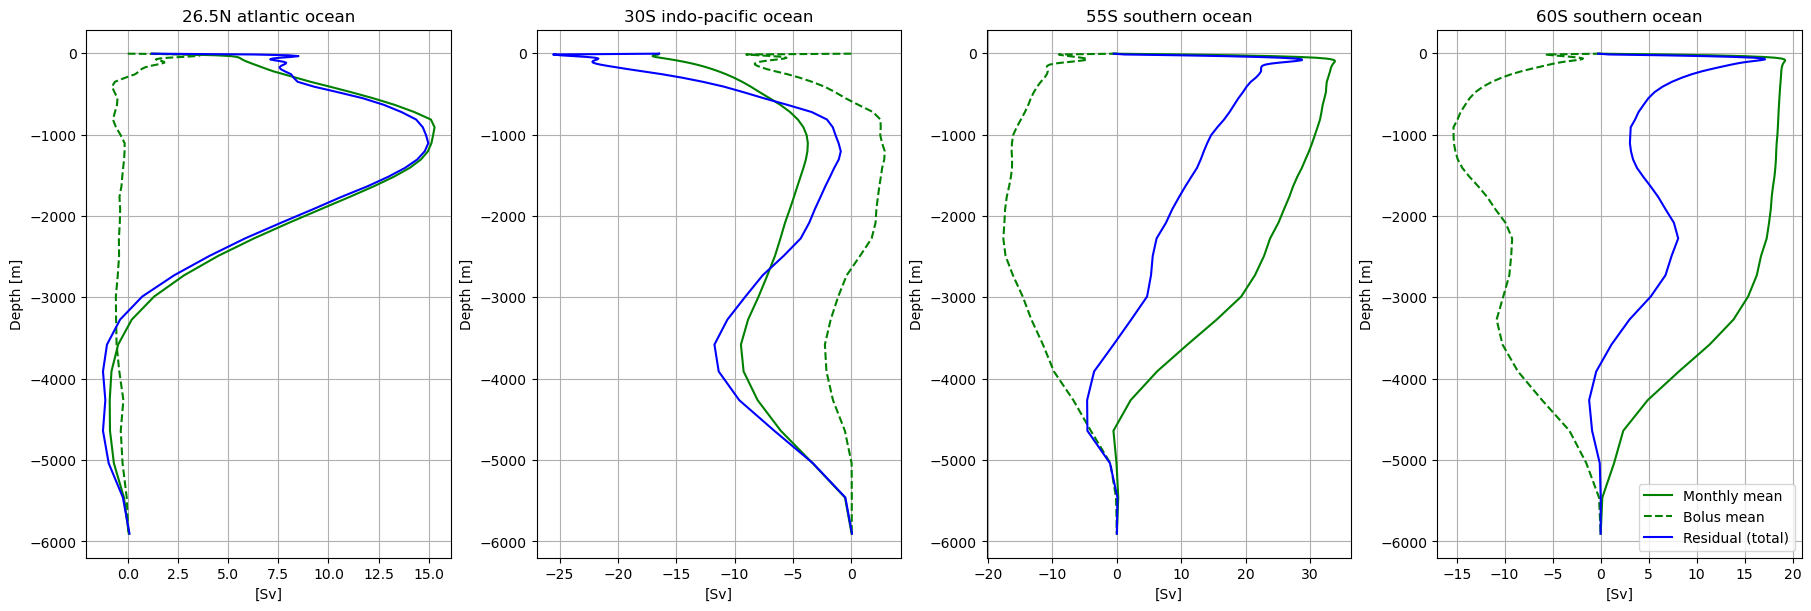

In [26]:
PSIs = [(PSI_26, PSI_bol_26), (PSI_30, PSI_bol_30), (PSI_55, PSI_bol_55), (PSI_60, PSI_bol_60)]
titles = ['26.5N atlantic ocean', '30S indo-pacific ocean', '55S southern ocean', '60S southern ocean']

fig = plt.figure(figsize=(18, 6), constrained_layout=True)
    
for index, PSI_tuple in enumerate(PSIs):
    
    PSI, PSI_bol = PSI_tuple
    
    plt.subplot(1, 4, index+1)
    plt.plot(PSI['psi_moc'].mean("time"), PSI["Z"], 
             color='green', label='Monthly mean')
    if PSI_bol is not None:
        plt.plot(PSI_bol['psi_moc'].mean("time"), PSI_bol["Z"], 
                 linestyle='--', color='green', label='Bolus mean')
        plt.plot(PSI_bol['psi_moc'].mean("time")+PSI['psi_moc'].mean("time"), PSI_bol["Z"],
                 linestyle='-', color='blue', label='Residual (total)')
    plt.ylabel("Depth [m]")
    plt.xlabel("[Sv]")
    plt.title(titles[index])
    plt.grid()
plt.legend()
plt.show()

In [27]:
def plot(PSI, PSI_bol=None):# Streamfunction over depth and time
    fig = plt.figure(figsize=(18, 6))
    plt.subplot(1, 4, (1, 3))
    plt.pcolormesh(PSI.time, PSI.Z, PSI.psi_moc.squeeze().T)
    if PSI_bol is not None:
        plt.pcolormesh(PSI.time, PSI.Z, PSI.psi_moc.squeeze().T+PSI_bol.psi_moc.squeeze().T)
    plt.colorbar()
    plt.ylabel('Depth [m]')
    
    plt.subplot(1, 4, 4)
    plt.plot(PSI['psi_moc'].mean("time"), PSI["Z"], 
             color='green', label='Residual Mean')
    if PSI_bol is not None:
        plt.plot(PSI_bol['psi_moc'].mean("time"), PSI_bol["Z"], 
                 linestyle='--', color='green', label='Bolus mean')
        plt.plot(PSI_bol['psi_moc'].mean("time")+PSI['psi_moc'].mean("time"), PSI_bol["Z"],
                 linestyle='-', color='blue', label='Sum mean')
    plt.ylabel("Depth [m]")
    plt.xlabel("[Sv]")
    plt.grid()
    plt.legend()
    plt.show()

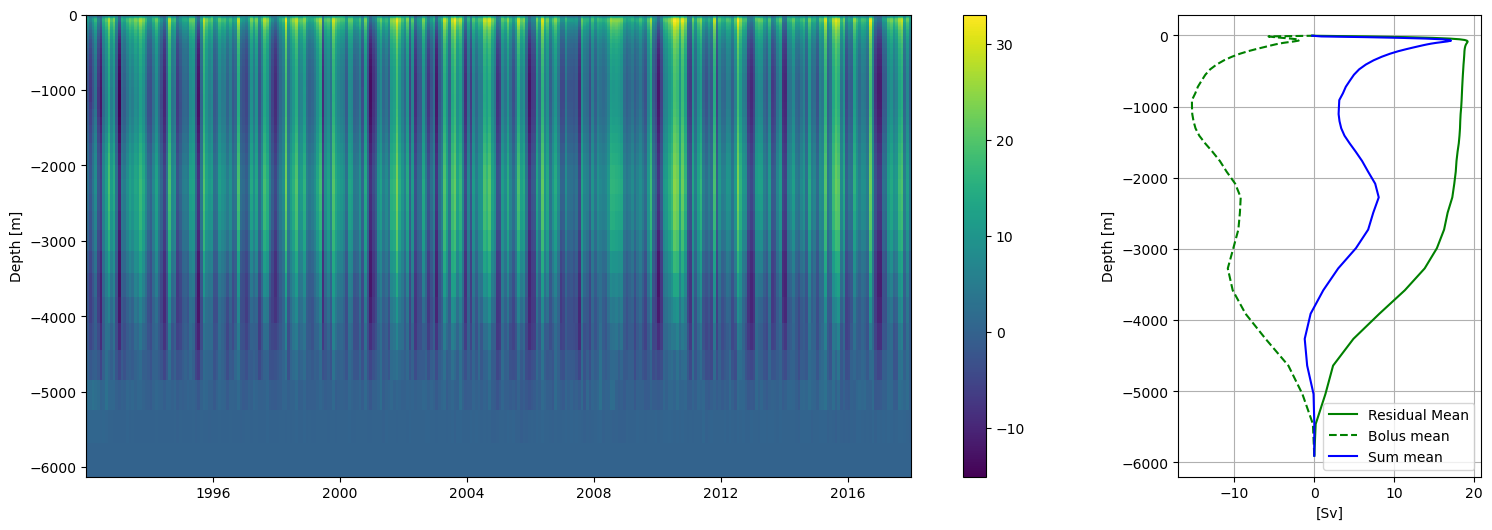

In [29]:
plot(PSI_60, PSI_bol_60)

### OLDER METHODS

#### 1. Tutorial from Ecco Website (streamfunction along section)

In [58]:
# Use this to define which latitude and longitudes we are working at 
basin = 'atlantic'
latitudes = scripts.archive.basin_masks.get_lats_of_interest_solodoch(basin)

# Parameter 'latitude' and 'longitudes' will be used to create the masks
latitude = 26.5
longitudes = scripts.archive.basin_masks.get_longitudes_at_latitude(latitude, basin, paths.geom_fp)

get_basin_name:  ['pac', 'atl', 'ind', 'arct', 'bering', 'southChina', 'mexico', 'okhotsk', 'hudson', 'med', 'java', 'north', 'japan', 'timor', 'eastChina', 'red', 'gulf', 'baffin', 'gin', 'barents'] C:\Users\aline\mambaforge\envs\gtc\Lib\site-packages\binary_data
load_binary_array: loading file C:\Users\aline\mambaforge\envs\gtc\Lib\site-packages\binary_data\basins.data
load_binary_array: data array shape  (1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4
shape after reading 
(13, 90, 90)
get_basin_name:  ['med'] C:\Users\aline\mambaforge\envs\gtc\Lib\site-packages\binary_data
load_binary_array: loading file C:\Users\aline\mambaforge\envs\gtc\Lib\site-packages\binary_data\basins.data
load_binary_array: data array shape  (1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims

In [59]:
from functools import reduce

masks_W = []
masks_S = [] 
masks_C = []

longitude_sections = np.split(longitudes, np.where(np.diff(longitudes) > 1)[0] + 1)

for section in longitude_sections:
    maskC, maskW, maskS = ecco.get_section_line_masks([0, latitude],[90, latitude], ds)
    masks_C.append(maskC)
    masks_W.append(maskW)
    masks_S.append(maskS)
    
maskC_tot = reduce(lambda x, y: x | y, masks_C)
maskSedge = reduce(lambda x, y: x | y, masks_S)
maskWedge = reduce(lambda x, y: x | y, masks_W)

plt.figure(figsize=(12,6))
#ecco.plot_proj_to_latlon_grid(ds.XC,ds.YC,maskC_tot,cmap='viridis',projection_type='robin',user_lon_0=0);

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

### 2. Custom system to calculate the masks in the native grid

(array([0, 1]), array([105218,     82], dtype=int64))


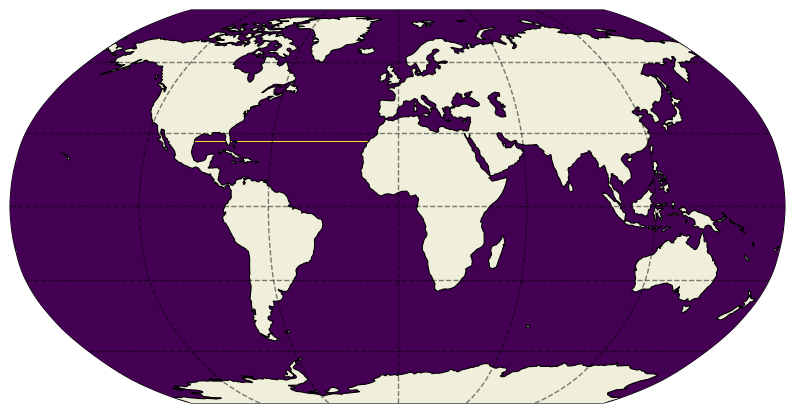

In [61]:
mask = scripts.archive.LLC0090_masking.get_gridllc0090_mask(ds, latitude, longitudes)
print(np.unique(mask.values, return_counts=True))

plt.figure(figsize=(10,10))
ecco.plot_proj_to_latlon_grid(ds.XC,ds.YC,mask,cmap='viridis',projection_type='robin',user_lon_0=0);

#### 3. Implementation from scratch from Emilio

In [70]:
velocity = ds['VVELMASS'].isel(time = 0)
delta_x = ds['dxG']
delta_z = ds['drF']

weighted_velocity = velocity * delta_x * delta_z

In [71]:
mask = mask.rename({'j' : 'j_g'}) 
weighted_velocity_at_lat = mask * weighted_velocity

weighted_velocity_at_lat

<xarray.DataArray (tile: 13, j_g: 90, i: 90, k: 50)>
dask.array<multiply, shape=(13, 90, 90, 50), dtype=float64, chunksize=(13, 90, 90, 50), chunktype=numpy.ndarray>
Coordinates:
    YC       (tile, j_g, i) float32 -88.24 -88.38 -88.52 ... -88.03 -88.08 -88.1
    XC       (tile, j_g, i) float32 -111.6 -111.3 -110.9 ... -105.6 -111.9
  * i        (i) int32 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j_g      (j_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * tile     (tile) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
    Z        (k) float32 -5.0 -15.0 -25.0 ... -5.039e+03 -5.461e+03 -5.906e+03
  * k        (k) int32 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
    time     datetime64[ns] 1992-01-16T18:00:00

In [220]:
lon_by_depth = []

for i in range(13):    
    arr = weighted_velocity_at_lat.isel(tile = i).fillna(0).values
    nonzero_ind = np.nonzero(arr)

    unique_vals = np.unique(nonzero_ind[0]), np.unique(nonzero_ind[1])
    if len(unique_vals[0]) == 1:
        nonzero_vals = arr[unique_vals[0][0], : , : ]
    elif len(unique_vals[1]) == 1:
        nonzero_vals = arr[ : , unique_vals[1][0], : ]
    else:
        print('No nonzero vals')
        continue

    print(nonzero_vals.shape)
    lon_by_depth.append(nonzero_vals)

(90, 50)
No nonzero vals
No nonzero vals
(90, 50)
No nonzero vals
No nonzero vals
No nonzero vals
No nonzero vals
No nonzero vals
(90, 50)
No nonzero vals
No nonzero vals
(90, 50)


In [221]:
lon_by_depth = np.concatenate(lon_by_depth, axis = 0)
lon_by_depth.shape

(360, 50)

Streamfunction is -830 Sverdrups


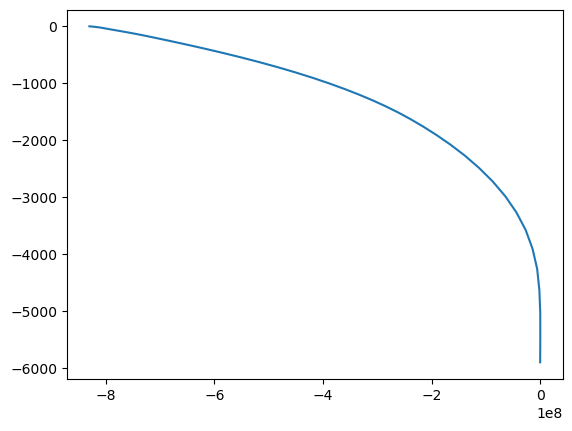

In [248]:
streamfunction = -1 * lon_by_depth.sum(axis = 0)[ : : -1].cumsum()
depth_level = np.abs(streamfunction).argmax()
print(f'Streamfunction is {round(streamfunction[depth_level] / (10 ** 6))} Sverdrups')

plt.plot(streamfunction, delta_z.Z[ : : -1]);

### Trying out janky function

In [9]:
from importlib import reload
reload(streamfunction)

<module 'streamfunction' from '/Users/emiliolr/Desktop/GTC-OTP/streamfunction.py'>

In [ ]:
strf_vals = []
for t in [i for i in range(10)]:
    strf_vals.append(streamfunction.calculate_streamfunction_JANKY(ds, basin = 'southern', latitude = -60, time = t, geom_fp = geom_fp))

In [12]:
strf_vals

[-830, -661, -696, -760, -687, -643, -811, -823, -819, -850]